Kelompok 7 :


1.   Nicholas Evan S | 5026231146
2.   Kayla Putri M | 5-26231158
3. Tahiyyah Mufhimah | 5026231170
4. Baqhiz Faruq S | 5026231212
5. Azrul Afif | 5026231166


# **Business Understanding**


EnergiSmart menghadirkan tantangan nyata dalam upaya membangun kota cerdas (Smart City) yang berkelanjutan. Dataset ini merekam kondisi iklim kota L setiap jam—meliputi temperatur udara, tekanan atmosfer, kecepatan angin, serta dua variabel cuaca tambahan dan mengaitkannya dengan konsumsi listrik pada waktu yang sama. Setiap baris data merepresentasikan satu jam pengamatan.

Mengapa penting?

Optimasi jaringan listrik – Dengan memahami pola hubungan cuaca dan konsumsi, operator dapat menyiapkan cadangan energi, mengurangi pemadaman, dan mengintegrasikan sumber terbarukan.
Perencanaan kota adaptif – Informasi tekanan, suhu ekstrem, dan kecepatan angin membantu pemerintah merancang kebijakan efisiensi energi, sistem pendinginan perkotaan, hingga skema tarif dinamis.
Kesadaran lingkungan – Prediksi yang akurat membuka peluang kampanye penghematan energi berbasis data, mendorong warga menurunkan jejak karbon.
Tujuan: Pemahaman dan penyelesaian hasil prediksi secara lengkap dari awal sampai akhir

# Install Pustaka

 Menginstal pustaka (libraries) Python ke dalam notebook.

- pip: Ini adalah akronim untuk "Pip Installs Packages" atau "Preferred Installer Program". pip adalah sistem manajemen paket standar yang digunakan untuk menginstal dan mengelola paket perangkat lunak yang ditulis dalam Python.
install: Ini adalah sub-perintah dari pip yang memberitahu pip untuk mengunduh dan menginstal paket yang ditentukan.
- Catboost: Ini adalah nama pustaka pertama yang diinstal. CatBoost adalah pustaka gradient boosting sumber terbuka yang dikembangkan oleh Yandex. Pustaka ini sangat efisien untuk tugas-tugas machine learning seperti klasifikasi dan regresi, terutama dengan data kategorikal.
- Tensorflow: Ini adalah nama pustaka kedua yang diinstal. TensorFlow adalah pustaka open-source yang dikembangkan oleh Google untuk pengembangan dan pelatihan model machine learning, terutama yang berkaitan dengan neural networks dan deep learning.

Kedua pustaka ini nantinya akan kita gunakan untuk melakukan forecasting


In [1]:
!pip install catboost
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


# Impor Pustaka

Kode yang diberikan merupakan serangkaian impor pustaka Python esensial yang secara kolektif menyiapkan lingkungan yang lengkap untuk berbagai tugas analisis data dan pembelajaran mesin. Impor ini mencakup alat fundamental untuk manipulasi dan visualisasi data (seperti Pandas, NumPy, Matplotlib, Seaborn), fungsi untuk pra-pemrosesan data dan rekayasa fitur (Scikit-learn, SciPy), utilitas untuk analisis statistik dan deret waktu (Statsmodels), serta kerangka kerja untuk membangun model pembelajaran mesin tradisional (CatBoost, XGBoost) dan model deep learning yang kompleks (TensorFlow/Keras, termasuk lapisan LSTM untuk data sekuensial). Selain itu, metrik evaluasi dan fungsi pembagian data juga turut diimpor untuk memastikan validasi model yang tepat.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from scipy.signal import savgol_filter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

import xgboost as xgb
from catboost import CatBoostRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, LSTM, Conv1D,
    GlobalAveragePooling1D, AveragePooling1D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Daftar dan Akses Data dari Kaggle

Data dari kaggle kami download dan kami masukkan di github agar lebih fleksibel saja dalam mengerjakan untuk kelompok kami.

In [3]:
train=pd.read_csv("https://raw.githubusercontent.com/tiamufh/datasetpap/refs/heads/main/data_train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/tiamufh/datasetpap/refs/heads/main/data_test.csv")

In [4]:
train.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik
0,0,2021-09-17 00:00:00,15.9,-17.1,571.910,1003.0,A,216.0
1,1,2021-09-17 01:00:00,15.5,-19.3,575.040,996.0,A,210.0
2,2,2021-09-17 02:00:00,15.1,-20.0,578.435,1000.0,A,225.0
3,3,2021-09-17 03:00:00,15.9,-17.1,582.580,995.0,A,216.0
4,4,2021-09-17 04:00:00,15.9,-19.3,586.600,1005.0,A,222.0


In [5]:
train.tail()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan,konsumsi_listrik
24331,32179,2025-05-19 19:00:00,27.8,10.7,4.505,981.0,A,186.0
24332,32180,2025-05-19 20:00:00,27.8,7.9,4.005,976.0,A,198.0
24333,32181,2025-05-19 21:00:00,27.8,10.0,5.920,989.0,A,192.0
24334,32182,2025-05-19 22:00:00,27.0,9.3,3.040,982.0,A,183.0
24335,32183,2025-05-19 23:00:00,27.4,10.0,4.205,979.0,A,192.0


In [6]:
test.head()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan
0,32184,2025-05-20 00:00:00,27.8,7.1,2.075,980.0,A
1,32185,2025-05-20 01:00:00,26.2,7.1,5.005,988.0,A
2,32186,2025-05-20 02:00:00,27.4,6.4,7.385,990.0,A
3,32187,2025-05-20 03:00:00,26.6,9.3,1.890,973.0,A
4,32188,2025-05-20 04:00:00,26.2,9.3,2.540,989.0,A


In [7]:
test.tail()

,ID,tanggal_waktu,suhu,beban_listrik,kecepatan_angin,tekanan_udara,dampak_lingkungan
2155,34891,2025-09-09 19:00:00,21.8,-15.0,51.685,1009.0,A
2156,34892,2025-09-09 20:00:00,20.6,-11.4,56.105,1005.0,A
2157,34893,2025-09-09 21:00:00,21.4,-12.9,61.275,995.0,A
2158,34894,2025-09-09 22:00:00,20.6,-11.4,67.210,996.0,A
2159,34895,2025-09-09 23:00:00,21.1,-11.4,71.880,1009.0,A


In [8]:
df = pd.concat([train, test], ignore_index=True)

In [9]:
df['konsumsi_listrik'].describe()

,konsumsi_listrik
count,24283.000000
mean,532.445209
std,4826.021227
min,174.000000
25%,219.000000
50%,270.000000
75%,342.000000
max,99999.000000


In [10]:
df.describe()

,ID,suhu,beban_listrik,kecepatan_angin,tekanan_udara,konsumsi_listrik
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,24283.000000
mean,17455.500000,25.056941,-1.916233,23.959956,986.450615,532.445209
std,10122.873673,4.826620,10.424860,48.280321,12.002647,4826.021227
min,0.000000,12.700000,-32.900000,1.075000,953.000000,174.000000
25%,8717.750000,20.600000,-10.700000,3.155000,978.000000,219.000000
50%,17435.500000,25.800000,-1.400000,6.545000,986.000000,270.000000
75%,26177.250000,28.900000,7.900000,22.260000,995.000000,342.000000
max,34895.000000,35.300000,18.600000,586.600000,1024.000000,99999.000000


In [11]:
def clean_and_denoise_column(df, col, window_size=7, polyorder=2):
    series = df[col].copy()

    Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    series[(series < lower) | (series > upper)] = np.nan

    series = series.ffill().bfill()

    #Smoothing
    w_size = min(window_size, len(series)//2*2-1)  # harus ganjil
    if w_size < 3:
        w_size = 3
    smooth = savgol_filter(series, window_length=w_size, polyorder=polyorder)

    return pd.Series(smooth, index=series.index)


In [12]:
df_cleaned = df.copy()
numeric_cols = df.select_dtypes(include='number').columns

# Proses setiap kolom numerik
for col in numeric_cols:
    print(f"Memproses kolom: {col}")
    df_cleaned[col] = clean_and_denoise_column(df_cleaned, col, window_size=24, polyorder=2)

# Verifikasi NaN setelah diproses
print("\nNaN setelah diproses:")
print(df_cleaned[numeric_cols].isna().sum())


Memproses kolom: ID
Memproses kolom: suhu
Memproses kolom: beban_listrik
Memproses kolom: kecepatan_angin
Memproses kolom: tekanan_udara
Memproses kolom: konsumsi_listrik

NaN setelah diproses:
ID                  0
suhu                0
beban_listrik       0
kecepatan_angin     0
tekanan_udara       0
konsumsi_listrik    0
dtype: int64


In [13]:
# Inisialisasi encoder
ordinal_encoder = OrdinalEncoder()

# Pastikan kolom ada dan bertipe kategori/string
df_cleaned['dampak_lingkungan'] = ordinal_encoder.fit_transform(df_cleaned[['dampak_lingkungan']])

In [43]:
df_cleaned['tanggal_waktu'] = pd.to_datetime(df_cleaned['tanggal_waktu'])

# Tambahkan fitur waktu
df_cleaned['hour'] = df_cleaned['tanggal_waktu'].dt.hour
df_cleaned['dayofweek'] = df_cleaned['tanggal_waktu'].dt.dayofweek
df_cleaned['month'] = df_cleaned['tanggal_waktu'].dt.month
df_cleaned['day_of_month'] = df_cleaned['tanggal_waktu'].dt.day

In [15]:
# Pilih dua fitur dengan korelasi tertinggi
selected_features = df_cleaned[['beban_listrik', 'hour']].copy()

# Buat polynomial features hingga derajat 2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(selected_features)

# Buat DataFrame dengan nama kolom
feature_names = poly.get_feature_names_out(['beban_listrik', 'hour'])
df_poly = pd.DataFrame(poly_features, columns=feature_names, index=df_cleaned.index)

# Gabungkan hanya 2 fitur polynomial terbaik
df_cleaned = pd.concat(
    [df_cleaned, df_poly[['beban_listrik^2', 'beban_listrik hour']]],
    axis=1
)


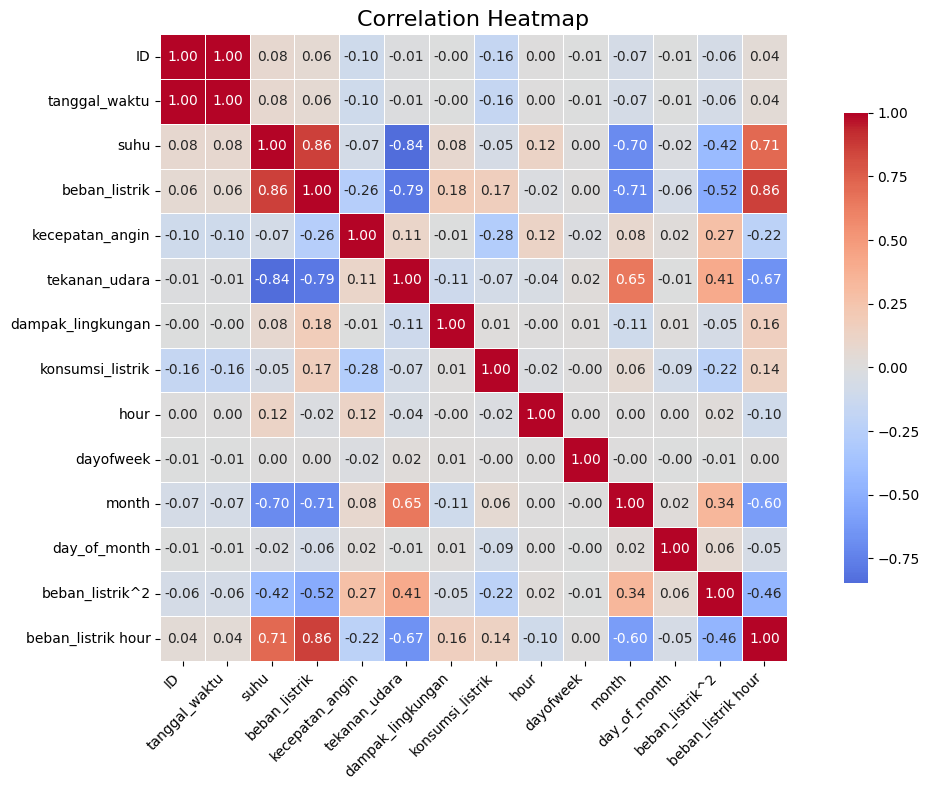

In [16]:
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


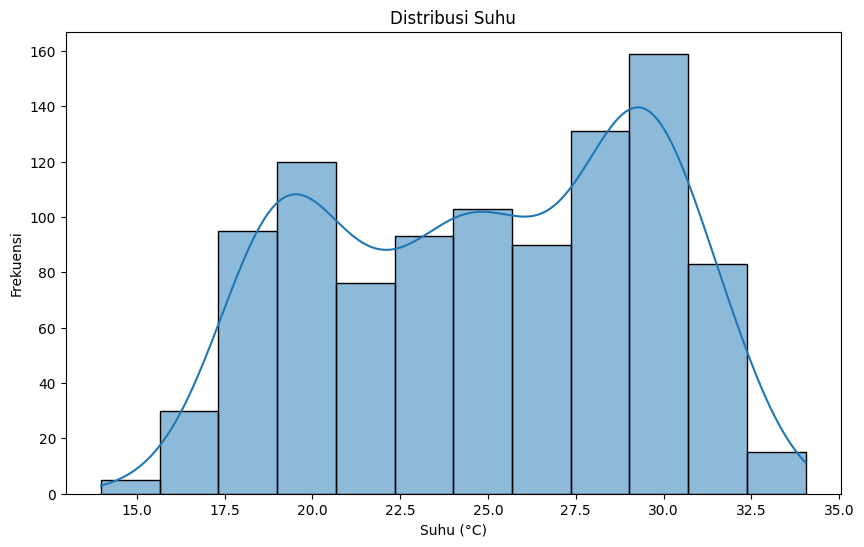

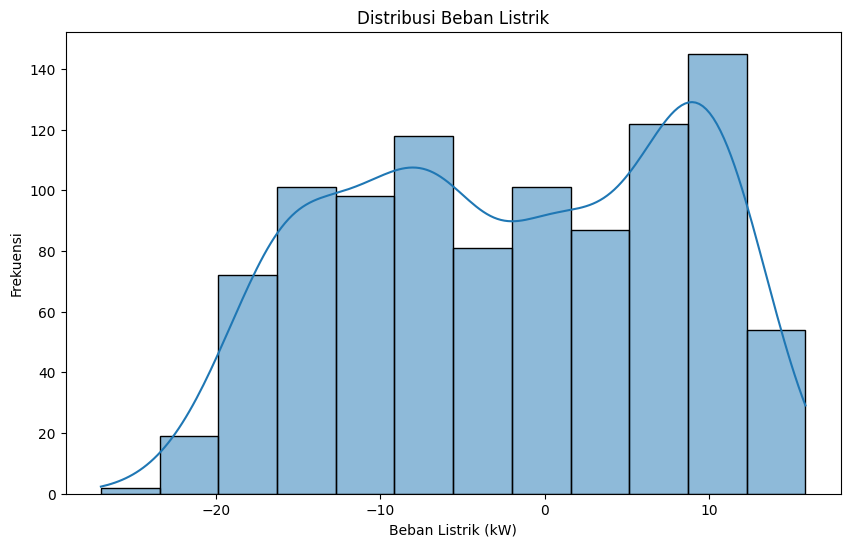

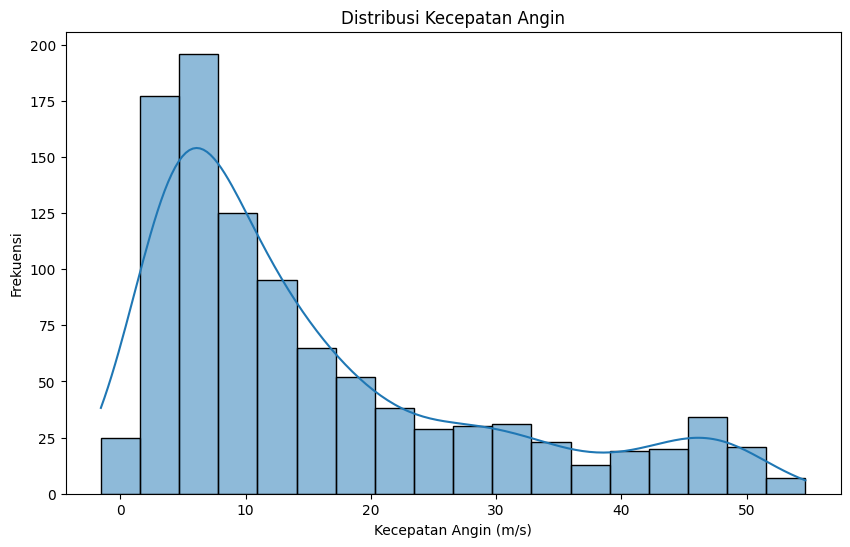

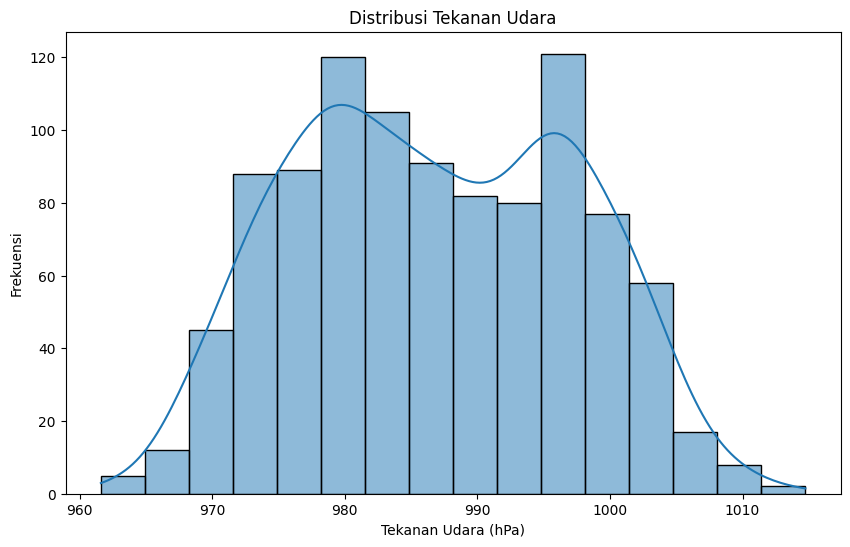

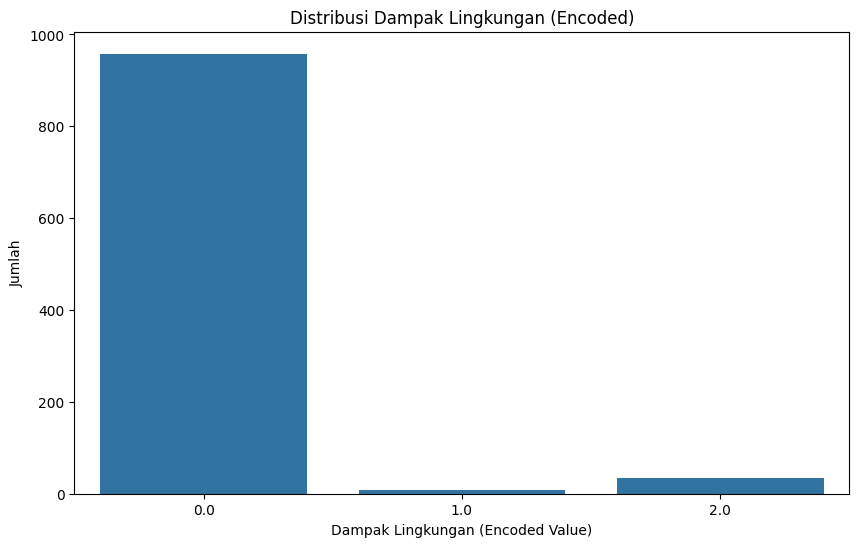

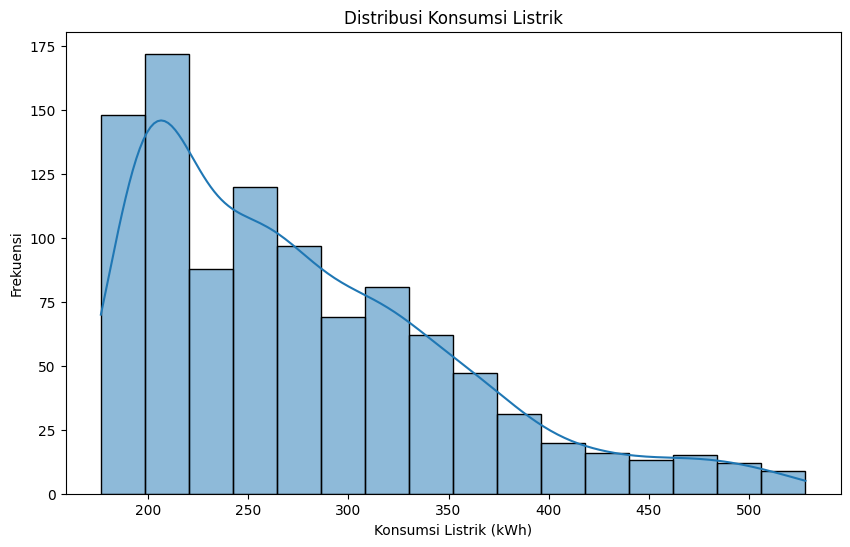

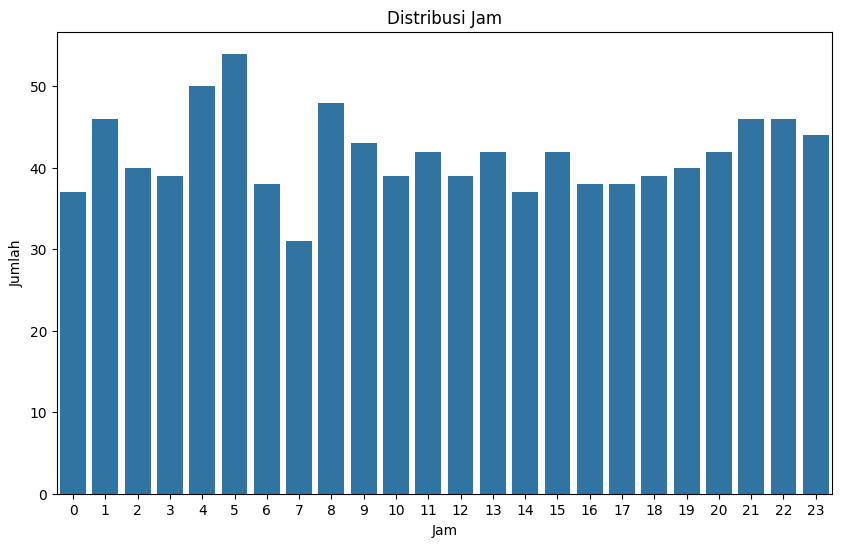

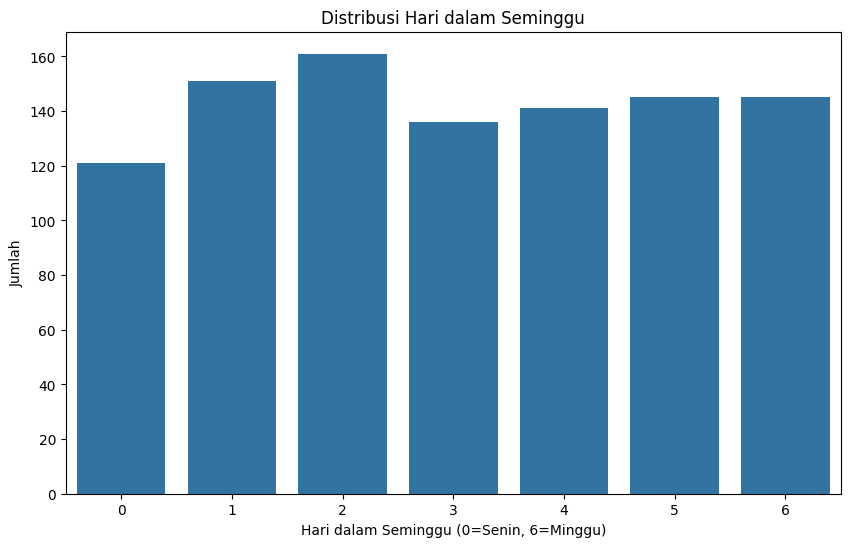

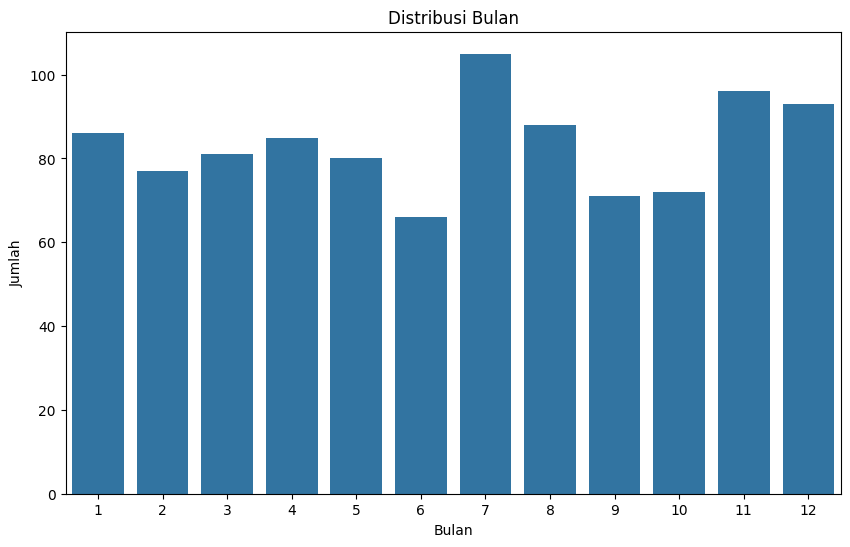

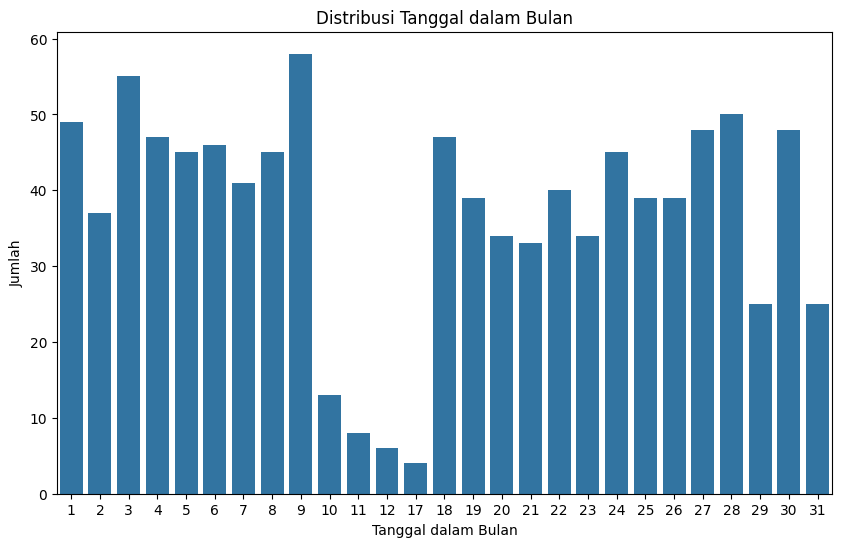

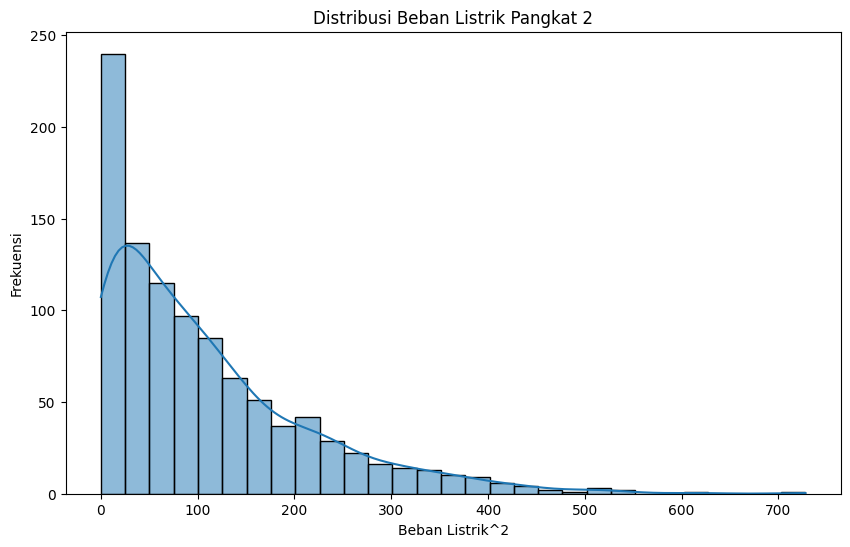

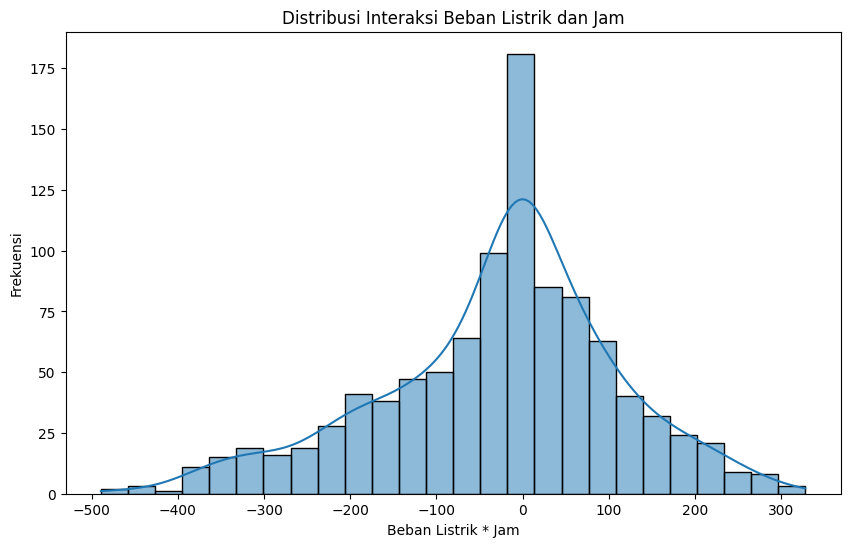

In [17]:
# Sample data
df_sample = df_cleaned.sample(n=1000, random_state=42)

# Visualisasi kolom 'suhu'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['suhu'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi kolom 'beban_listrik'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['beban_listrik'], kde=True)
plt.title('Distribusi Beban Listrik')
plt.xlabel('Beban Listrik (kW)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi kolom 'kecepatan_angin'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['kecepatan_angin'], kde=True)
plt.title('Distribusi Kecepatan Angin')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi kolom 'tekanan_udara'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['tekanan_udara'], kde=True)
plt.title('Distribusi Tekanan Udara')
plt.xlabel('Tekanan Udara (hPa)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi kolom 'dampak_lingkungan' (setelah ordinal encoding)
plt.figure(figsize=(10, 6))
sns.countplot(x='dampak_lingkungan', data=df_sample)
plt.title('Distribusi Dampak Lingkungan (Encoded)')
plt.xlabel('Dampak Lingkungan (Encoded Value)')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi kolom 'konsumsi_listrik'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['konsumsi_listrik'], kde=True)
plt.title('Distribusi Konsumsi Listrik')
plt.xlabel('Konsumsi Listrik (kWh)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi kolom 'hour'
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df_sample)
plt.title('Distribusi Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi kolom 'dayofweek'
plt.figure(figsize=(10, 6))
sns.countplot(x='dayofweek', data=df_sample)
plt.title('Distribusi Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi kolom 'month'
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_sample)
plt.title('Distribusi Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi kolom 'day_of_month'
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_month', data=df_sample)
plt.title('Distribusi Tanggal dalam Bulan')
plt.xlabel('Tanggal dalam Bulan')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi kolom 'beban_listrik^2'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['beban_listrik^2'], kde=True)
plt.title('Distribusi Beban Listrik Pangkat 2')
plt.xlabel('Beban Listrik^2')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi kolom 'beban_listrik hour'
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['beban_listrik hour'], kde=True)
plt.title('Distribusi Interaksi Beban Listrik dan Jam')
plt.xlabel('Beban Listrik * Jam')
plt.ylabel('Frekuensi')
plt.show()

In [48]:
len_train = len(df_cleaned)-2160

# Pisahkan lagi
df_train_cleaned = df_cleaned.iloc[:len_train].copy()
df_test = df_cleaned.iloc[len_train:].copy()

# maka pastikan di test_cleaned kolomnya di-drop agar sesuai format
if "konsumsi_listrik" in df_test.columns:
    df_test = df_test.drop(columns=["konsumsi_listrik"])

print("Train cleaned shape:", df_train_cleaned.shape)
print("Test cleaned shape:", df_test.shape)

Train cleaned shape: (24336, 14)
Test cleaned shape: (2160, 13)


In [19]:
# Fitur dan Target
features = ['hour', 'dayofweek', 'month', 'suhu', 'beban_listrik',
            'tekanan_udara', 'kecepatan_angin', 'dampak_lingkungan','beban_listrik^2', 'beban_listrik hour','day_of_month']
target = 'konsumsi_listrik'

#Bersihkan Data
df_model = df_train_cleaned.copy()
df_model = df_model.dropna(subset=[target] + features)

#Encoding dan Scaling
encoder = OrdinalEncoder()
df_model[['dampak_lingkungan']] = encoder.fit_transform(df_model[['dampak_lingkungan']])

#Fitur dan target
X = df_model[features]
y = df_model[target]

#Split data 80 20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Split data 70 30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#Split data 60 40
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Modelling

### XGB

XGBoost (eXtreme Gradient Boosting) adalah sebuah algoritma machine learning yang sangat populer dan efisien, berbasis pada ensemble learning dari pohon keputusan (decision trees). Lebih spesifik lagi, ia adalah implementasi yang dioptimalkan dari Gradient Boosting.

In [20]:
X_train_xgb = X_train_80.copy()
y_train_xgb = y_train_80.copy()

X_test_xgb = X_test_20.copy()
y_test_xgb = y_test_20.copy()

X_pred_xgb = df_test[features].copy()

print("Prepared variables for XGB:")
print(f"X_train_XGB shape: {X_train_xgb.shape}")
print(f"y_train_XGB shape: {y_train_xgb.shape}")
print(f"X_test_XGB shape (for evaluation): {X_test_xgb.shape}")
print(f"y_test_XGB shape (for evaluation): {y_test_xgb.shape}")
print(f"X_predict_XGB shape (for final prediction): {X_pred_xgb.shape}")

Prepared variables for XGB:
X_train_XGB shape: (19468, 11)
y_train_XGB shape: (19468,)
X_test_XGB shape (for evaluation): (4868, 11)
y_test_XGB shape (for evaluation): (4868,)
X_predict_XGB shape (for final prediction): (2160, 11)


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

model_xgboost = xgb.XGBRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    random_seed=42,
    verbose=100
)

# Fit model
model_xgboost.fit(X_train_xgb, y_train_xgb)

# Prediksi
y_pred_xgboost = model_xgboost.predict(X_test_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "depth", "iterations", "random_seed", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


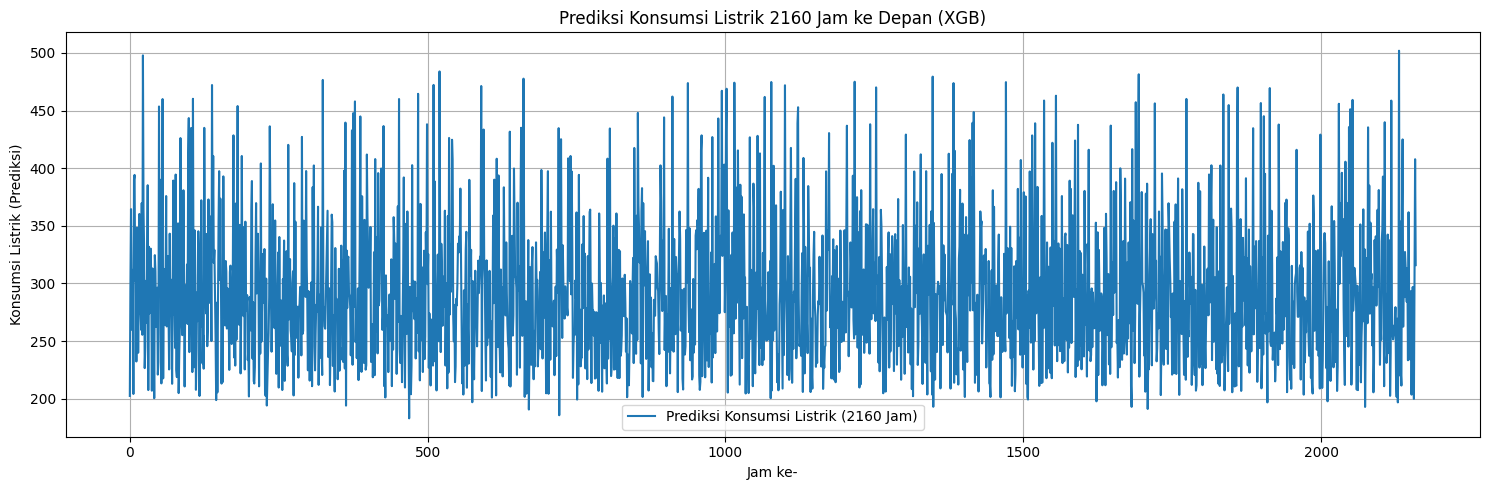

In [47]:
plt.figure(figsize=(15, 5))
plt.plot(y_pred_xgboost[:2160], label='Prediksi Konsumsi Listrik (2160 Jam)', color='tab:blue')
plt.title('Prediksi Konsumsi Listrik 2160 Jam ke Depan (XGB)')
plt.xlabel('Jam ke-')
plt.ylabel('Konsumsi Listrik (Prediksi)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### CatBoost

CatBoost adalah sebuah algoritma machine learning sumber terbuka yang merupakan implementasi dari Gradient Boosting on Decision Trees. Seperti algoritma gradient boosting lainnya (seperti XGBoost dan LightGBM), CatBoost membangun model secara sekuensial. Setiap "pohon keputusan" baru yang ditambahkan ke dalam ansambel berusaha memperbaiki kesalahan yang dibuat oleh kumpulan pohon sebelumnya. Proses ini terus berlanjut hingga model mencapai tingkat akurasi yang diinginkan atau tidak ada perbaikan signifikan yang terjadi.

In [26]:
X_train_catboost = X_train_80.copy()
y_train_catboost = y_train_80.copy()

X_test_catboost = X_test_20.copy()
y_test_catboost = y_test_20.copy()

X_predict_catboost = df_test[features].copy()

print("Prepared variables for CatBoost:")
print(f"X_train_catboost shape: {X_train_catboost.shape}")
print(f"y_train_catboost shape: {y_train_catboost.shape}")
print(f"X_test_catboost shape (for evaluation): {X_test_catboost.shape}")
print(f"y_test_catboost shape (for evaluation): {y_test_catboost.shape}")
print(f"X_predict_catboost shape (for final prediction): {X_predict_catboost.shape}")

Prepared variables for CatBoost:
X_train_catboost shape: (19468, 11)
y_train_catboost shape: (19468,)
X_test_catboost shape (for evaluation): (4868, 11)
y_test_catboost shape (for evaluation): (4868,)
X_predict_catboost shape (for final prediction): (2160, 11)


In [27]:
# Inisialisasi model CatBoost
model_cat = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    random_seed=42,
    verbose=100
)

# Fit model
model_cat.fit(
    X_train_catboost, y_train_catboost,
    eval_set=(X_test_catboost, y_test_catboost),
    early_stopping_rounds=20
)

# Prediksi
y_pred_cat = model_cat.predict(X_test_catboost)

0:	learn: 81.1120378	test: 80.2314757	best: 80.2314757 (0)	total: 52.5ms	remaining: 26.2s
100:	learn: 53.4238231	test: 53.0628691	best: 53.0628691 (100)	total: 535ms	remaining: 2.11s
200:	learn: 46.6294318	test: 46.6885238	best: 46.6885238 (200)	total: 988ms	remaining: 1.47s
300:	learn: 42.4248218	test: 42.9383174	best: 42.9383174 (300)	total: 1.45s	remaining: 962ms
400:	learn: 39.4144946	test: 40.3536219	best: 40.3536219 (400)	total: 1.89s	remaining: 465ms
499:	learn: 36.7733845	test: 38.2165793	best: 38.2165793 (499)	total: 2.34s	remaining: 0us

bestTest = 38.21657927
bestIteration = 499



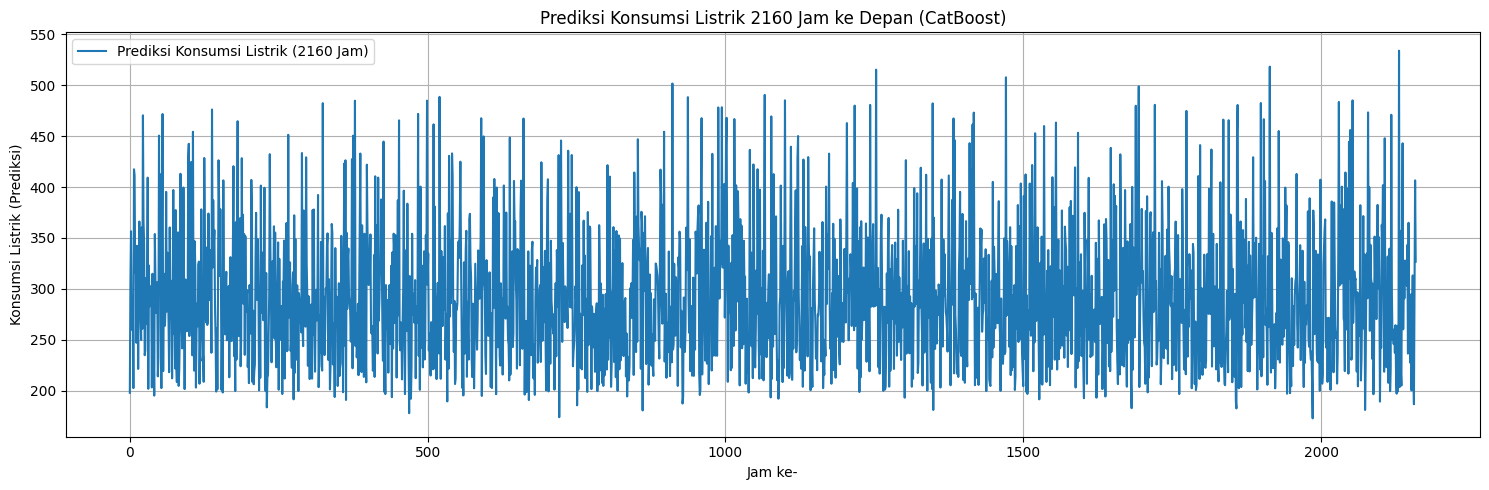

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(y_pred_cat[:2160], label='Prediksi Konsumsi Listrik (2160 Jam)', color='tab:blue')
plt.title('Prediksi Konsumsi Listrik 2160 Jam ke Depan (CatBoost)')
plt.xlabel('Jam ke-')
plt.ylabel('Konsumsi Listrik (Prediksi)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Esembled (LSTM + CatBosst)

Konsep Ensembled Model LSTM + CatBoost mengacu pada strategi menggabungkan kelebihan dua jenis model machine learning yang sangat berbeda tetapi komplementer:

LSTM (Long Short-Term Memory): Sebuah jenis jaringan saraf berulang (Recurrent Neural Network - RNN) yang sangat efektif untuk data sekuensial atau deret waktu (misalnya, data historis yang memiliki urutan, seperti harga saham harian, pembacaan sensor per jam, atau konsumsi listrik per waktu). LSTM unggul dalam menangkap dependensi jangka panjang dalam urutan data.
CatBoost: Algoritma gradient boosting yang berbasis pohon keputusan, sangat kuat untuk data tabular (tabel) dan secara khusus unggul dalam menangani fitur kategorikal secara otomatis, serta dikenal tahan overfitting.
Mengapa Menggabungkan Keduanya (Ensemble)?

Tujuan utama dari ensemble learning adalah untuk mencapai performa yang lebih baik (lebih akurat, lebih stabil, atau lebih robust) daripada model tunggal mana pun. Menggabungkan LSTM dan CatBoost sangat masuk akal karena mereka memiliki kelebihan yang saling melengkapi:

LSTM: Luar biasa dalam memahami pola dan dependensi temporal dalam data deret waktu. Ia dapat "mempelajari" bagaimana nilai-nilai masa lalu memengaruhi nilai masa depan.
CatBoost: Sangat baik dalam menangani fitur-fitur tabular statis atau fitur-fitur yang tidak memiliki sifat urutan yang jelas, serta fitur kategorikal. Ia juga dapat menangkap interaksi kompleks antar fitur.
Dalam konteks data deret waktu, seringkali ada dua jenis informasi:

Informasi Temporal: Pola-pola dari waktu ke waktu (misalnya, tren musiman, siklus harian, dependensi nilai sebelumnya). Ini adalah kekuatan LSTM.
Informasi Atribut/Fitur Lain: Fitur-fitur yang mungkin tidak bersifat temporal tetapi relevan (misalnya, jenis hari libur, kondisi cuaca, harga produk promo).

Stacking:
-  Memberikan performa terbaik karena meta-model dapat belajar dari kekuatan dan kelemahan masing-masing base model. Lebih kompleks untuk diimplementasikan dan membutuhkan validasi silang yang hati-hati.

Cascading/Sequential Ensemble:
* Proses: Salah satu model memproses data terlebih dahulu, dan outputnya (misalnya, prediksi atau fitur laten) kemudian digunakan sebagai input untuk model berikutnya.



In [29]:
# Define panjang dari sequence
time_steps = 24

# Buat Sequence
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [30]:
#Fitur LSTM
lstm_features = ['suhu', 'beban_listrik', 'tekanan_udara', 'kecepatan_angin', 'hour', 'dayofweek', 'month', 'day_of_month']
lstm_target = 'konsumsi_listrik'

# Siapkan data untuk seuqence
X_lstm_data = df_model[lstm_features]
y_lstm_data = df_model[lstm_target]

# Buat Sequence
X_lstm, y_lstm = create_sequences(X_lstm_data, y_lstm_data, time_steps)

# Split data 80 train 20 test
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42
)

print("\nPrepared variables for LSTM:")
print(f"X_train_lstm shape: {X_train_lstm.shape}")
print(f"y_train_lstm shape: {y_train_lstm.shape}")
print(f"X_test_lstm shape (for evaluation): {X_test_lstm.shape}")
print(f"y_test_lstm shape (for evaluation): {y_test_lstm.shape}")

#Buat Model LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mse')

# Training LSTM
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False # Penting untuk time series
)

# Prediksi LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)

#Ini pakai Stacking
# Prediksi seluruh sequence-formatted training data
X_full_train_lstm_seq, y_full_train_lstm_seq = create_sequences(X_lstm_data, y_lstm_data, time_steps)
y_pred_lstm_full_train_seq = lstm_model.predict(X_full_train_lstm_seq)

lstm_pred_feature_full_train = pd.Series(
    y_pred_lstm_full_train_seq.flatten(),
    index=df_model.index[time_steps:]
)

#Buat Fitur baru lstm_prediction untuk training CatBoost
df_model_combined = df_model.copy()
df_model_combined['lstm_prediction'] = np.nan
df_model_combined.loc[lstm_pred_feature_full_train.index, 'lstm_prediction'] = lstm_pred_feature_full_train

# Drop Baris yang NaN
df_model_combined_clean = df_model_combined.dropna(subset=['lstm_prediction']).copy()

# Define fitur untuk model kombinasi, dan masukkan dalam fitur list
features_combined = features + ['lstm_prediction']
target_combined = target # Target remains the same

# Siapkan fitur dan target
X_combined = df_model_combined_clean[features_combined]
y_combined = df_model_combined_clean[target_combined]

# Split agar 80 test 20 train
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

print("\nPrepared variables for Combined Model (CatBoost + LSTM Feature):")
print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"y_train_combined shape: {y_train_combined.shape}")
print(f"X_test_combined shape (for evaluation): {X_test_combined.shape}")
print(f"y_test_combined shape (for evaluation): {y_test_combined.shape}")


# Inisialisasi model CatBoost with combined features
model_cat_combined = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    random_seed=42,
    verbose=100
)

# Fit combined CatBoost model
model_cat_combined.fit(
    X_train_combined, y_train_combined,
    eval_set=(X_test_combined, y_test_combined),
    early_stopping_rounds=20,
)

# Prediksi dengan combined CatBoost + LTSM model
y_pred_combined = model_cat_combined.predict(X_test_combined)


# Gabungkan fungsi 'time_steps' dari data training and dan fitur data tes
X_predict_lstm_data_combined = pd.concat([df_model[lstm_features].iloc[-time_steps:], df_test[lstm_features]], axis=0)

# Buat target dummy untuk membuat sequence dalam rangka kita hanya butuh fitur sequence
dummy_y = pd.Series(np.zeros(len(X_predict_lstm_data_combined)), index=X_predict_lstm_data_combined.index)

X_predict_lstm_seq, _ = create_sequences(X_predict_lstm_data_combined, dummy_y, time_steps)

# Predik dengan LSTM yang sudah di train  dengan seqeunce test teraakhir
y_pred_lstm_test_seq = lstm_model.predict(X_predict_lstm_seq)

# Samakan prediksi LSTM dengan index dari data test
lstm_pred_feature_test = pd.Series(
    y_pred_lstm_test_seq.flatten(),
    index=df_test.index
)

# tambahkan hasil predisksi LSTM sebagai fitur baru untuk data test
X_predict_combined = df_test[features].copy()
X_predict_combined['lstm_prediction'] = lstm_pred_feature_test

# Ensure the columns are in the same order as the training data for the combined model
X_predict_combined = X_predict_combined[features_combined]

# Final prediksi untuk model kombinasi
final_predictions = model_cat_combined.predict(X_predict_combined)

print("\nFinal Predictions on Test Data:")
print(final_predictions[:10])
print(f"Number of final predictions: {len(final_predictions)}")




Prepared variables for LSTM:
X_train_lstm shape: (19449, 24, 8)
y_train_lstm shape: (19449,)
X_test_lstm shape (for evaluation): (4863, 24, 8)
y_test_lstm shape (for evaluation): (4863,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - loss: 84614.2344 - val_loss: 70877.0859
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 68444.8672 - val_loss: 58155.6562
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 56136.8789 - val_loss: 47400.0508
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 45707.3789 - val_loss: 38300.2031
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - loss: 36885.0352 - val_loss: 30663.8848
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 29491.7168 - val_loss: 24345.9023
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 23389.4219 - val_loss: 19224.8672
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 18460.2461 - val_loss: 15189.7832
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 14594.5479 - val_loss: 12130.7168
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - loss: 11681.9219 - val_loss: 9930.8467
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/s

# Evaluasi

In [31]:
# Evaluasi XGB
rmse_xgboost = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgboost))
r2_xgboost = r2_score(y_test_xgb, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test_xgb, y_pred_xgboost)

print(f"RMSE XGBoost: {rmse_xgboost:.4f}")
print(f"R² XGBoost: {r2_xgboost:.4f}")
print(f"MAE XGBoost: {mae_xgboost:.4f}")

RMSE XGBoost: 42.3924
R² XGBoost: 0.7299
MAE XGBoost: 32.2053


In [32]:
# Evaluasi CatBoost
rmse_cat = np.sqrt(mean_squared_error(y_test_catboost, y_pred_cat))
r2_cat = r2_score(y_test_catboost, y_pred_cat)
mae_cat = mean_squared_error(y_test_catboost, y_pred_cat)

print(f"RMSE CatBoost: {rmse_cat:.4f}")
print(f"R² CatBoost: {r2_cat:.4f}")
print(f"MAE CatBoost: {mae_cat:.4f}")

RMSE CatBoost: 38.2166
R² CatBoost: 0.7805
MAE CatBoost: 1460.5069


In [33]:
# Evaluasi LSTM + CatBoost
rmse_combined = np.sqrt(mean_squared_error(y_test_combined, y_pred_combined))
r2_combined = r2_score(y_test_combined, y_pred_combined)
mae_combined = mean_squared_error(y_test_combined, y_pred_combined)

print(f"\nRMSE Combined Model (CatBoost + LSTM Feature): {rmse_combined:.4f}")
print(f"R² Combined Model (CatBoost + LSTM Feature): {r2_combined:.4f}")
print(f"MAE Combined Model (CatBoost + LSTM Feature): {mae_combined:.4f}")


RMSE Combined Model (CatBoost + LSTM Feature): 37.9636
R² Combined Model (CatBoost + LSTM Feature): 0.7843
MAE Combined Model (CatBoost + LSTM Feature): 1441.2337


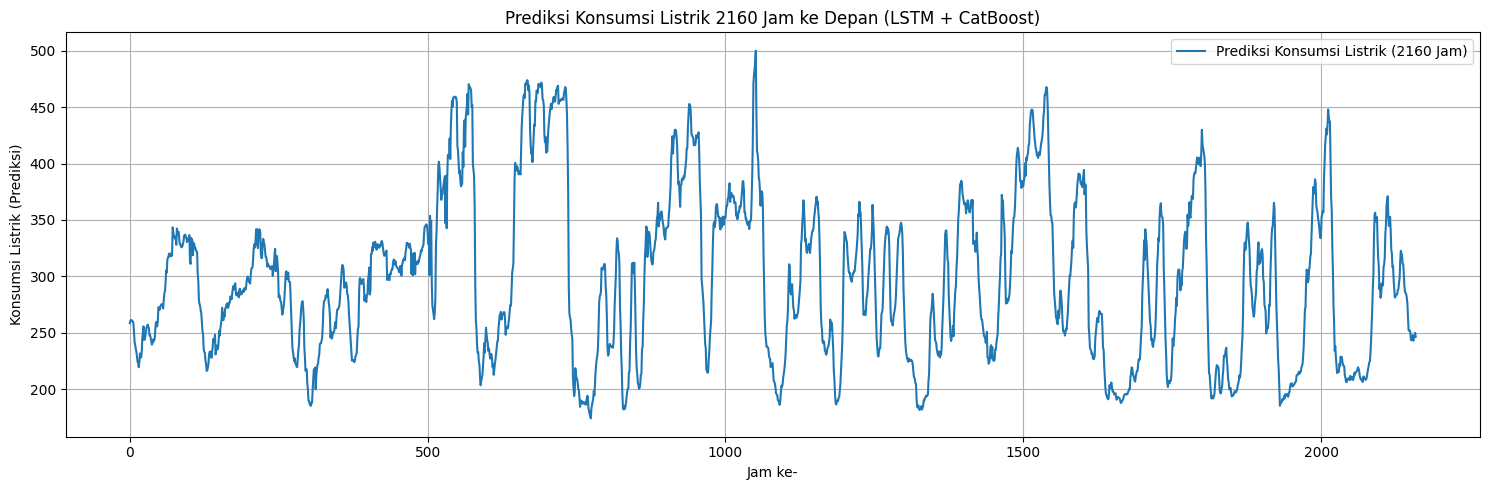

In [34]:
plt.figure(figsize=(15, 5))
# Plot the final predictions (2160 hours)
plt.plot(final_predictions, label='Prediksi Konsumsi Listrik (2160 Jam)', color='tab:blue')
plt.title('Prediksi Konsumsi Listrik 2160 Jam ke Depan (LSTM + CatBoost)')
plt.xlabel('Jam ke-')
plt.ylabel('Konsumsi Listrik (Prediksi)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Implementation

Untuk implementasi kami menggunakan esmbled model (LSTM + CatBoost) walaupun rmse dari XGB lebih kecil. Mengapa? karena mereka mampu saling melengkapi untuk setiap jenis data yang ada dan hal ini pun terbukti pada hasil pada kaggle yang sudah kami coba sebelumnya. Untuk hasil XGB lebih jelek karena model ini tidak punya kemampuan lebih dalam  menditeksi bagaimana nilai-nilai masa lalu memengaruhi nilai masa depan  dibandingkan dengan LSTM. Begitupula jika hanya menggunakan CatBoost saja. Namun CatBoost dan XGB memiliki kelebihan dalam menditeksi tabular statis atau fitur-fitur yang tidak memiliki sifat urutan yang jelas, serta fitur kategorikal, sehingga kedua model yaitu LSTM untuk deap learning dan CatBoost sangat cocok digunakan untuk memprediksi data kedepannya.

In [35]:
final_predictions

array([258.50449993, 260.53317644, 261.35243659, ..., 246.31833782,
       249.87822879, 246.29364275])

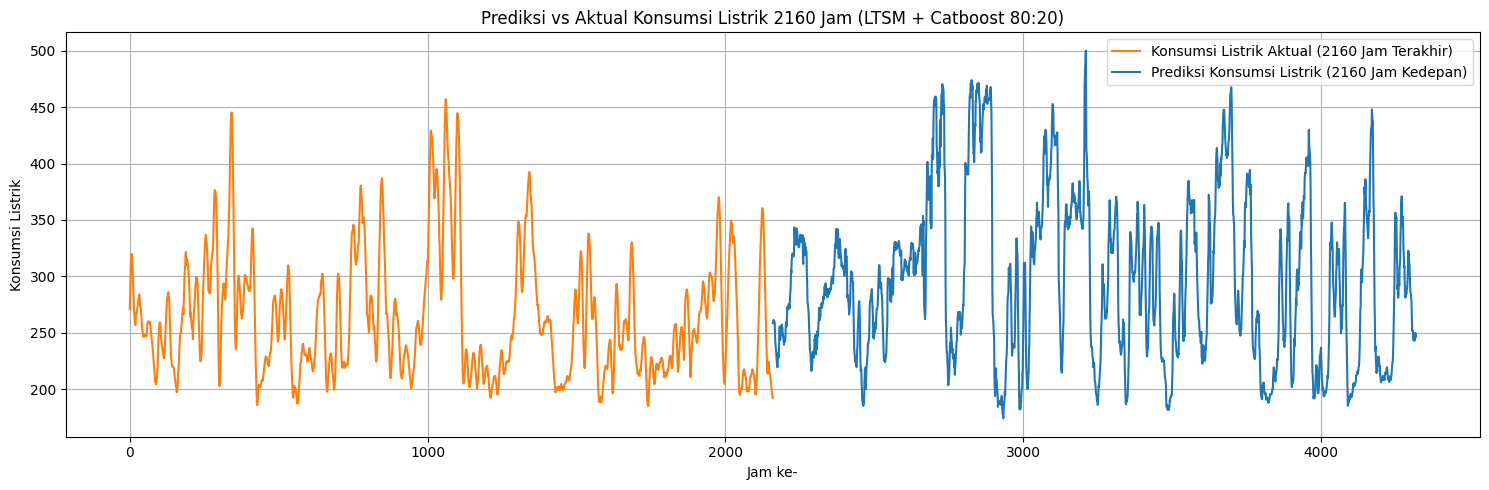

In [36]:
total_actual_data_length = len(y_lstm_data)

# Ambil 2160 jam terakhir dari data aktual (y_ltsm_data)
actual_data = y_lstm_data[-2160:].reset_index(drop=True)

predicted_index = np.arange(len(actual_data), len(actual_data) + len(final_predictions[:2160]))

plt.figure(figsize=(15, 5))
plt.plot(actual_data.index, actual_data, label='Konsumsi Listrik Aktual (2160 Jam Terakhir)', color='tab:orange')
plt.plot(predicted_index, final_predictions[:2160], label='Prediksi Konsumsi Listrik (2160 Jam Kedepan)', color='tab:blue')
plt.title('Prediksi vs Aktual Konsumsi Listrik 2160 Jam (LTSM + Catboost 80:20)')
plt.xlabel('Jam ke-')
plt.ylabel('Konsumsi Listrik')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ambil template submission

In [37]:
y=pd.read_csv("/content/sample_data/submission_format.csv")
y.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/submission_format.csv'

In [38]:
y['konsumsi_listrik']=final_predictions

/tmp/ipython-input-38-11960041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['konsumsi_listrik']=final_predictions


In [39]:
y.head()

,konsumsi_listrik
0,220.347692
1,219.333512
2,218.382359
3,217.494235
4,216.66914


Simpan dalam file

In [41]:
y.to_csv("COBALSTMXCAT.csv", index=False)